In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

2023-03-05 12:46:10.499392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 12:46:11.319916: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-05 12:46:11.319952: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-05 12:46:11.494890: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-05 12:46:13.292489: W tensorflow/stream_executor/platform/de

In [2]:
image_generator = ImageDataGenerator(
    rescale= 1.0/255.0,
    shear_range= 0.1,
    zoom_range= 0.3,
)
# image_generator_test= ImageDataGenerator(
#     rescale= 1./255.,
# )

In [3]:
train_data= image_generator.flow_from_directory('data/',color_mode = 'grayscale', class_mode= 'binary', batch_size=50, target_size=(500,500))


Found 550 images belonging to 2 classes.


In [4]:
test_data= image_generator.flow_from_directory('test_data/', color_mode = 'grayscale', class_mode= 'binary', batch_size=50, target_size=(500,500))

Found 74 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500,500,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

         

2023-03-05 12:48:40.992033: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27557888 exceeds 10% of free system memory.
2023-03-05 12:48:41.004989: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27557888 exceeds 10% of free system memory.


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 249, 249, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 60, 60, 64)      

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics =['accuracy'])

In [9]:
weights= compute_class_weight(class_weight='balanced', classes=np.unique(train_data.classes),y=train_data.classes )

In [10]:
class_weights = dict(zip(np.unique(train_data.classes), weights))

In [11]:
es = EarlyStopping(monitor='val_loss', mode = 'min', patience=3)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2  ,factor=0.2, min_lr=0.001)
mch = ModelCheckpoint('cheskxry.h5', monitor='val_loss', save_best_only=True)

In [ ]:
history = model.fit_generator(train_data, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data), epochs=30, callbacks=[es, rlrop, mch],class_weight=class_weights) 

/tmp/ipykernel_170374/285321336.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data), epochs=30, callbacks=[es, rlrop, mch],class_weight=class_weights)


Epoch 1/30
11/11 [==============================] - 173s 12s/step - loss: 0.7017 - accuracy: 0.4145 - val_loss: 0.6744 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 2/30
11/11 [==============================] - 132s 12s/step - loss: 0.6510 - accuracy: 0.5945 - val_loss: 0.5441 - val_accuracy: 0.7027 - lr: 0.0010
Epoch 3/30
11/11 [==============================] - 124s 11s/step - loss: 0.6056 - accuracy: 0.6800 - val_loss: 0.4696 - val_accuracy: 0.7703 - lr: 0.0010
Epoch 4/30
11/11 [==============================] - 124s 11s/step - loss: 0.5311 - accuracy: 0.7255 - val_loss: 0.4536 - val_accuracy: 0.7703 - lr: 0.0010
Epoch 5/30
11/11 [==============================] - 125s 11s/step - loss: 0.4876 - accuracy: 0.7727 - val_loss: 0.5540 - val_accuracy: 0.7297 - lr: 0.0010
Epoch 6/30
11/11 [==============================] - 125s 11s/step - loss: 0.4750 - accuracy: 0.7982 - val_loss: 0.4177 - val_accuracy: 0.8108 - lr: 0.0010
Epoch 7/30
 2/11 [====>.........................] - ETA: 1:48 - loss: 

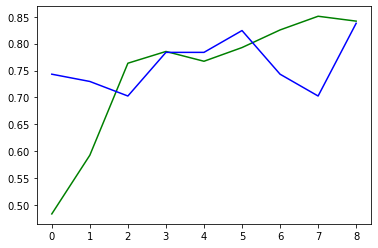

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='blue')